In [15]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Set plotting style
sns.set_theme()

In [16]:
# Function to load data
def load_data():
    customers_df = pd.read_csv('../data/Customers.csv')
    products_df = pd.read_csv('../data/Products.csv')
    transactions_df = pd.read_csv('../data/Transactions.csv')
    
    # Convert date columns
    customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'])
    transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'])
    
    return customers_df, products_df, transactions_df

# Load data
customers_df, products_df, transactions_df = load_data()

# Display basic information
print("Customers Dataset Info:")
print(customers_df.info())
print("\nProducts Dataset Info:")
print(products_df.info())
print("\nTransactions Dataset Info:")
print(transactions_df.info())

Customers Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   CustomerID    200 non-null    object        
 1   CustomerName  200 non-null    object        
 2   Region        200 non-null    object        
 3   SignupDate    200 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 6.4+ KB
None

Products Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None

Transactions Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeI

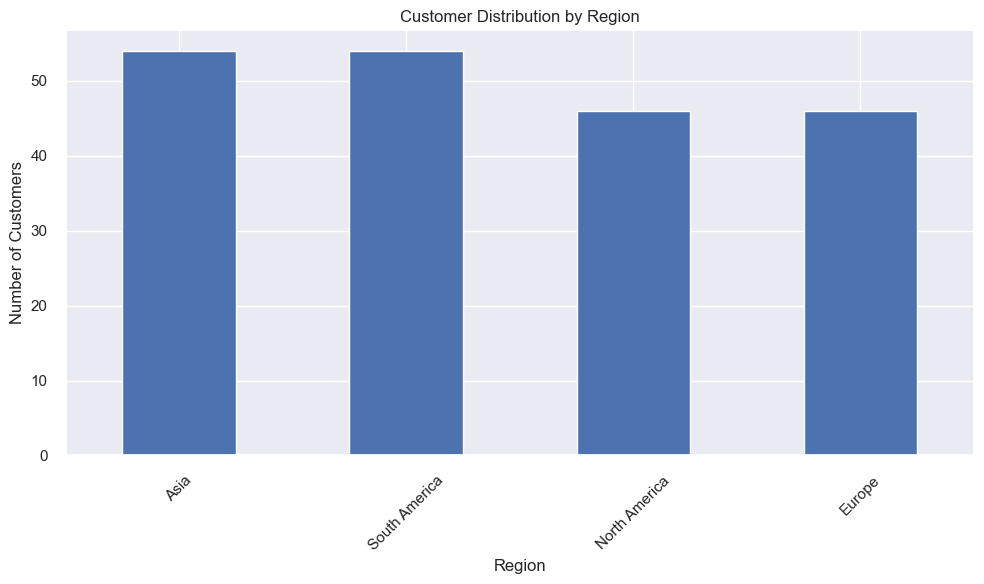

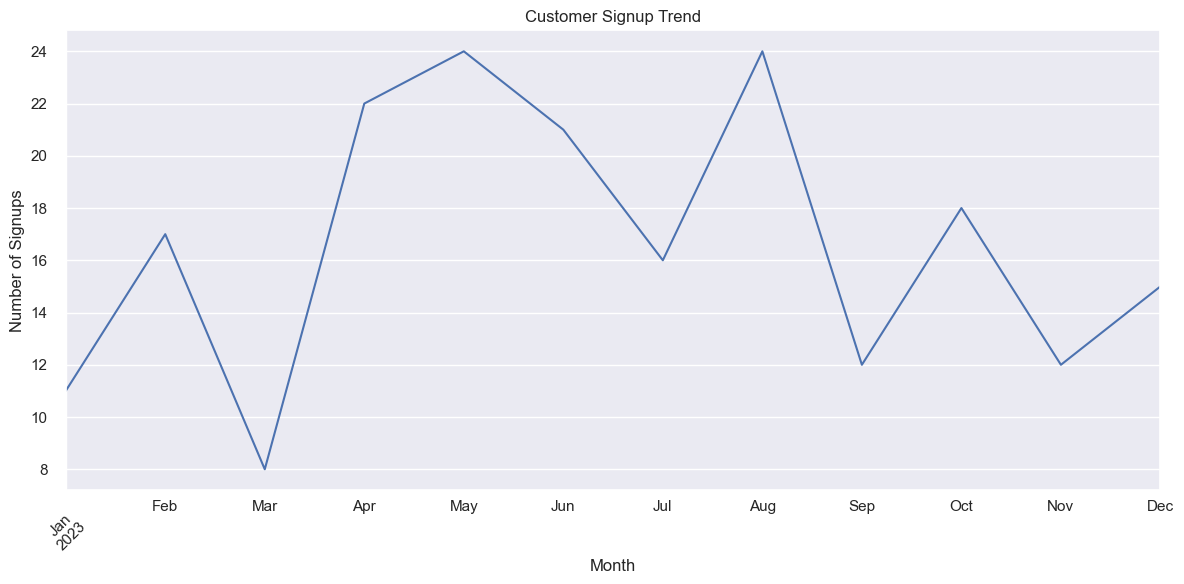

In [17]:
# Customer distribution by region
plt.figure(figsize=(10, 6))
customers_df['Region'].value_counts().plot(kind='bar')
plt.title('Customer Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Customer signup trend
plt.figure(figsize=(12, 6))
customers_df['SignupDate'].dt.to_period('M').value_counts().sort_index().plot(kind='line')
plt.title('Customer Signup Trend')
plt.xlabel('Month')
plt.ylabel('Number of Signups')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

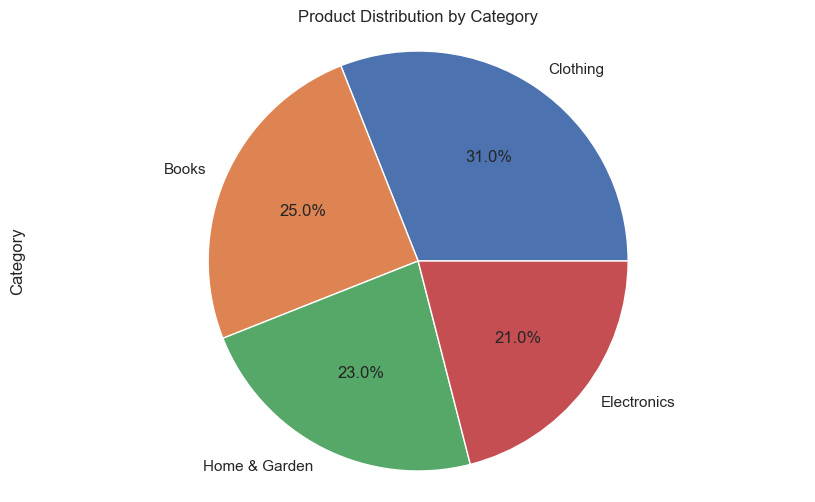

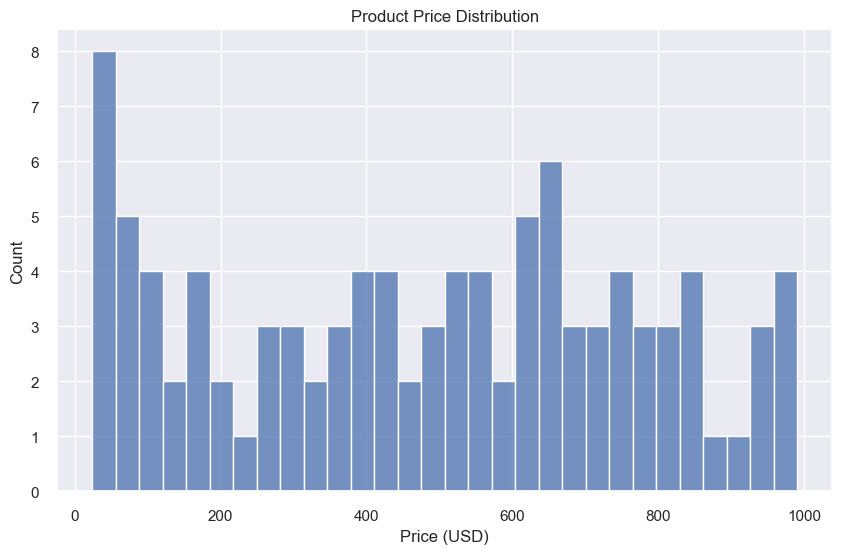

In [18]:
# Product distribution by category
plt.figure(figsize=(10, 6))
products_df['Category'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Product Distribution by Category')
plt.axis('equal')
plt.show()

# Price distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=products_df, x='Price', bins=30)
plt.title('Product Price Distribution')
plt.xlabel('Price (USD)')
plt.ylabel('Count')
plt.show()

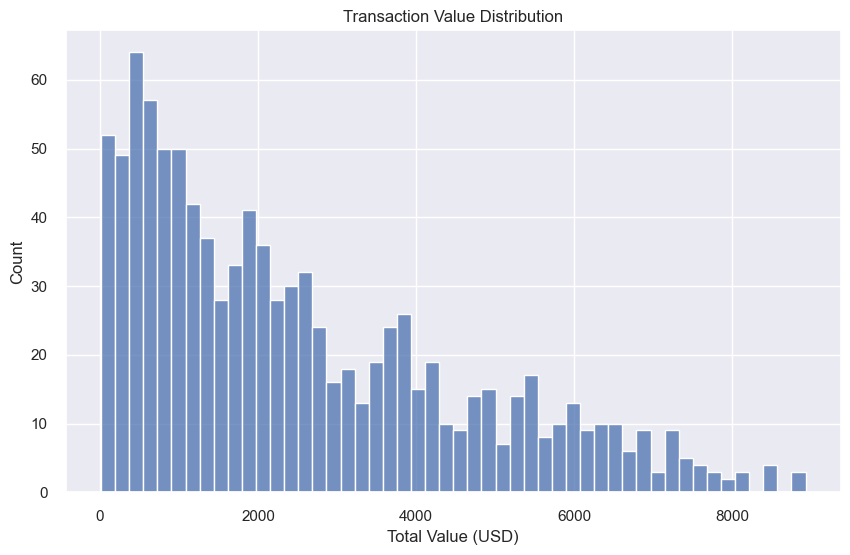

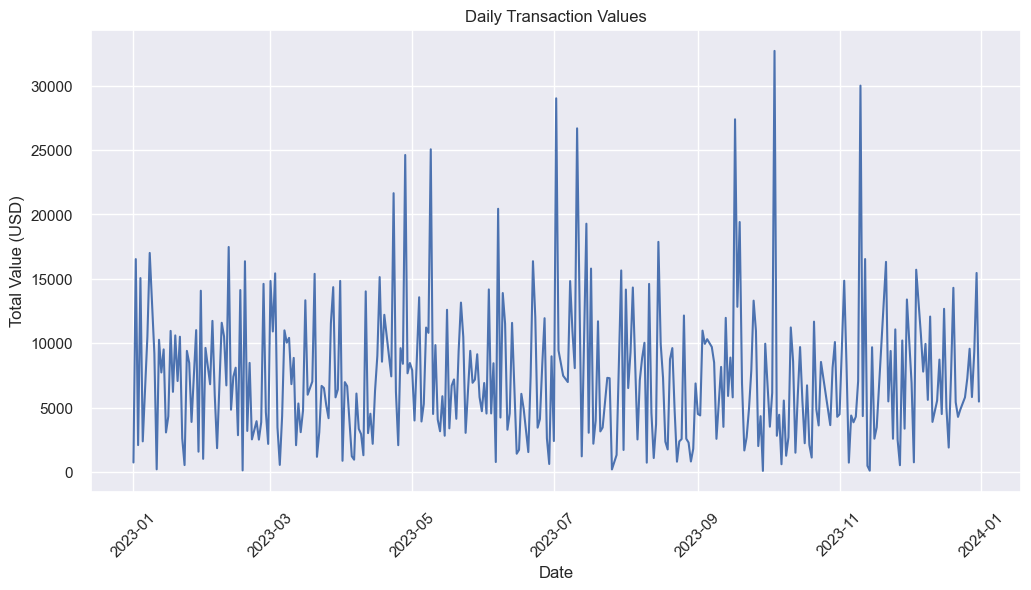

In [19]:
# Transaction value distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=transactions_df, x='TotalValue', bins=50)
plt.title('Transaction Value Distribution')
plt.xlabel('Total Value (USD)')
plt.ylabel('Count')
plt.show()

# Transaction trend over time
daily_transactions = transactions_df.groupby('TransactionDate')['TotalValue'].sum().reset_index()
plt.figure(figsize=(12, 6))
plt.plot(daily_transactions['TransactionDate'], daily_transactions['TotalValue'])
plt.title('Daily Transaction Values')
plt.xlabel('Date')
plt.ylabel('Total Value (USD)')
plt.xticks(rotation=45)
plt.show()

In [20]:
# Create EDA Report
from matplotlib.backends.backend_pdf import PdfPages

def generate_eda_report():
    with PdfPages('../reports/EDA.pdf') as pdf:
        # Customer Analysis
        plt.figure(figsize=(10, 6))
        customers_df['Region'].value_counts().plot(kind='bar')
        plt.title('Customer Distribution by Region')
        plt.xlabel('Region')
        plt.ylabel('Number of Customers')
        plt.xticks(rotation=45)
        plt.tight_layout()
        pdf.savefig()
        plt.close()
        
        # Product Analysis
        plt.figure(figsize=(10, 6))
        products_df['Category'].value_counts().plot(kind='pie', autopct='%1.1f%%')
        plt.title('Product Distribution by Category')
        plt.axis('equal')
        pdf.savefig()
        plt.close()
        
        # Transaction Analysis
        plt.figure(figsize=(10, 6))
        sns.histplot(data=transactions_df, x='TotalValue', bins=50)
        plt.title('Transaction Value Distribution')
        plt.xlabel('Total Value (USD)')
        plt.ylabel('Count')
        pdf.savefig()
        plt.close()
        
        # Add Business Insights text page
        fig = plt.figure(figsize=(8.5, 11))
        plt.axis('off')
        insights = [
            "1. Customer Geographic Distribution: [Your insight here]",
            "2. Product Category Performance: [Your insight here]",
            "3. Transaction Patterns: [Your insight here]",
            "4. Customer Behavior: [Your insight here]",
            "5. Revenue Analysis: [Your insight here]"
        ]
        plt.text(0.1, 0.9, "Business Insights:", fontsize=14, fontweight='bold')
        for i, insight in enumerate(insights):
            plt.text(0.1, 0.8-i*0.1, insight, fontsize=12)
        pdf.savefig()
        plt.close()

# Generate the report
generate_eda_report()
print("EDA report generated successfully!")

EDA report generated successfully!
